In [17]:
import pandas as pd
import matplotlib as mpl

In [19]:
%matplotlib inline

mpl.rcParams["font.size"] = 16
mpl.rcParams["figure.figsize"] = (14, 7)

In [11]:
metrics = pd.read_csv(
    "metrics/metrics.tsv", 
    sep="\t",
    parse_dates=["month"]
).set_index("month")

In [7]:
m["existing_active_editors"] = m["active_editors"] - m["new_active_editors"] - m["second_month_active_editors"]

In [8]:
m = m.drop("active_editors", axis = 1)

In [9]:
m = m[["existing_active_editors", "second_month_active_editors", "new_active_editors"]]

In [ ]:
for col in eds.columns:
    eds[col] = eds[col].apply(np.int)

In [ ]:
eds.columns = ['existing active editors', 'second month active editors',
       'new (first-month) active editors']

In [ ]:
eds.tail()

In [ ]:
ax = eds.plot.area()
plt.title("Global monthly active editors")
plt.ylabel("editors per month")
plt.autoscale(enable=True, axis="x", tight=True);

## Non-bot edits exploration

In [13]:
edits = metrics["nonbot_edits"]
edits.tail()

month
2017-12-01    19926673.0
2018-01-01    20374752.0
2018-02-01    19934503.0
2018-03-01    25176956.0
2018-04-01    20762284.0
Name: nonbot_edits, dtype: float64

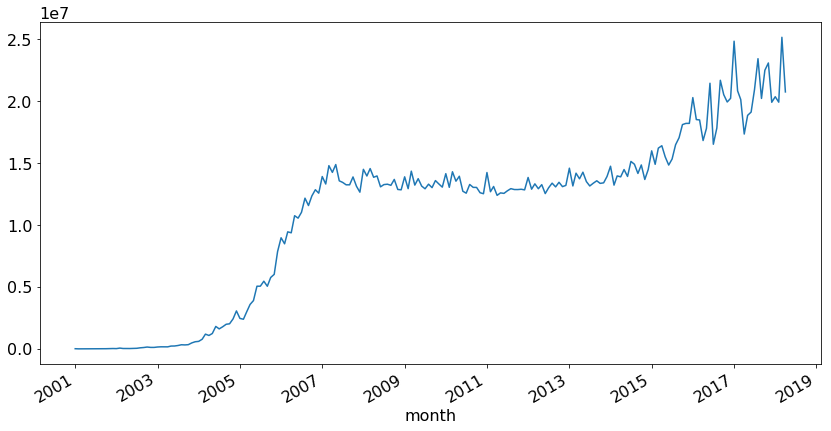

In [20]:
edits.plot()

In [ ]:
jan_2005 = dt.datetime(2005, 1, 1)
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(edits["non_bot_edits"][jan_2005:], model='additive', freq=12)
result.plot()
plt.autoscale(enable=True, axis="x", tight=True)

In [ ]:
(result.observed - result.seasonal).plot()

In [ ]:
from pandas.plotting import autocorrelation_plot

In [ ]:
edits["non_bot_edits"].plot()

In [ ]:
editor

In [ ]:
d_w_revs = wmf.hive.run("""
    select
        wiki_db as wiki,
        dt as d,
        sum(if(metric = "daily_edits", value, 0)) - sum(if(metric = "daily_edits_by_bot_users", value, 0)) as nonbot_revs
    from wmf.mediawiki_metrics
    where
        snapshot = "2018-04" and
        metric in ("daily_edits", "daily_edits_by_bot_users")
    group by wiki_db, dt
""")

In [ ]:
d_w_revs["d"] = pd.to_datetime(d_w_revs["d"])
d_w_revs = d_w_revs.set_index("d")

In [ ]:
d_revs = pd.DataFrame({"tot": tot["2016":], "non_wd": non_wd["2016":], "wd": wd["2016":]})
d_revs.head()

In [ ]:
d_revs.tail()

In [ ]:
d_norm = d_revs.apply(lambda x: ((x - x[0])) / x[0])
d_norm.tail()

In [ ]:
d_norm.plot(ylim=0);

In [ ]:
tot = d_w_revs.groupby("d")["nonbot_revs"].sum().rolling(30).mean()

In [ ]:
tot["2014":].plot(ylim=0)

In [ ]:
non_wd = d_w_revs.query("wiki != 'wikidatawiki'").groupby("d")["nonbot_revs"].sum().rolling(30).mean()

In [ ]:
non_wd["2014-04":].plot(ylim=0)

In [ ]:
wd = d_w_revs.query("wiki == 'wikidatawiki'").groupby("d")["nonbot_revs"].sum().rolling(30).mean()

In [ ]:
wd["2014-04":].plot(ylim=0);